<a href="https://colab.research.google.com/github/Ajlag/cifar10_neural_network/blob/main/Apple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
from google.colab import files
upload = files.upload()

Saving AAPL - Jan2018.xls to AAPL - Jan2018.xls
Saving AAPL.xls to AAPL.xls


In [3]:
data_2013_df = pd.read_csv('AAPL - Jan2018.xls')
data_2018_df = pd.read_csv('AAPL.xls')


In [4]:
# Funkcija za pripremu podataka
def prepare_data(data):
    prices = data['Open'].values.astype(float)
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))
    return prices_scaled, scaler

In [5]:
# Priprema podataka za model
prices_2013, scaler_2013 = prepare_data(data_2013_df)
prices_2018, scaler_2018 = prepare_data(data_2018_df)

In [6]:
# Funkcija za kreiranje dataset-a za treniranje
def create_dataset(prices, look_back=1):
    X, y = [], []
    for i in range(len(prices) - look_back):
        X.append(prices[i:(i + look_back), 0])
        y.append(prices[i + look_back, 0])
    return np.array(X), np.array(y)

In [7]:
# Definisanje hiperparametara
look_back = 3
epochs = 100
batch_size = 1

In [8]:
# Kreiranje dataset-a za treniranje
train_X_2013, train_y_2013 = create_dataset(prices_2013, look_back)
train_X_2018, train_y_2018 = create_dataset(prices_2018, look_back)


In [9]:
# Transformacija podataka u oblik pogodan za RNN
train_X_2013 = np.reshape(train_X_2013, (train_X_2013.shape[0], 1, train_X_2013.shape[1]))
train_X_2018 = np.reshape(train_X_2018, (train_X_2018.shape[0], 1, train_X_2018.shape[1]))


In [10]:
# Kreiranje modela RNN
model_2013 = Sequential([
    LSTM(50, input_shape=(1, look_back)),
    Dropout(0.2),
    Dense(1)
])
model_2018 = Sequential([
    LSTM(50, input_shape=(1, look_back)),
    Dropout(0.2),
    Dense(1)
])

In [11]:
# Kompilacija modela
model_2013.compile(optimizer='adam', loss='mean_squared_error')
model_2018.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Treniranje modela
history_2013 = model_2013.fit(train_X_2013, train_y_2013, epochs=epochs, batch_size=batch_size)
history_2018 = model_2018.fit(train_X_2018, train_y_2018, epochs=epochs, batch_size=batch_size)


Epoch 1/100
17/17 [==============================] - 2s 2ms/step - loss: 0.4469
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 13/100
17/17 [=================

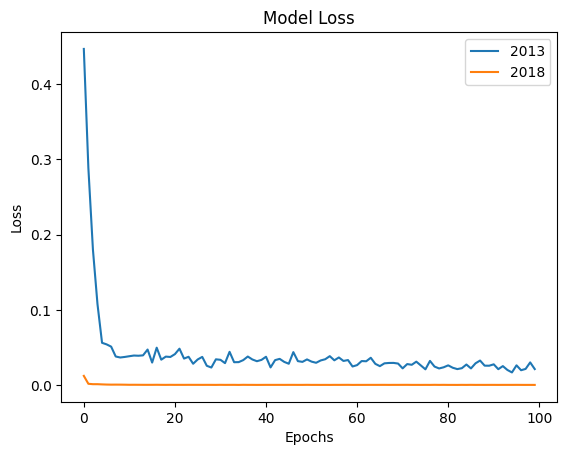

In [13]:
# Grafički prikaz loss funkcije tokom treniranja
plt.plot(history_2013.history['loss'], label='2013')
plt.plot(history_2018.history['loss'], label='2018')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()